In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, interp2d

In [2]:
plt.style.use('az-paper-twocol.mplstyle')
x = np.array([-2.398, -1.398, -0.398, 0.699, 1.699, 2.74])
y = np.array([-2.523, -2.0, -1.523, -1.0, -0.523, 0.0])
f = interp1d(x,y, fill_value='extrapolate') # f is g_psy which produces correct relic density, dependent on DM mass

In [3]:
def compcos(val):
    
    if val >= 0:
        ans = np.cos(2*np.pi*np.sqrt(val))
    else:
        ans = np.cosh(2*np.pi*np.sqrt(-val))
            
    return ans

def a_param(vel, m_DM):
    alpha = (10**f(np.log10(m_DM)))**2/(4*np.pi)
    return vel/(2*alpha)

def c_param(m_DM, m_phi):
    alpha = (10**f(np.log10(m_DM)))**2/(4*np.pi)
    return 6*alpha*m_DM/(np.pi**2*m_phi)

def Sommerfeld(a, c_param):
    val = a*c_param
    
    if c_param - val**2 >= 0:
        ans = np.pi/a*np.sinh(2*np.pi*val)/(np.cosh(2*np.pi*val)-np.cos((c_param-val**2)**0.5))*((c_param-1)**2+4*val**2)/(1+4*val**2)
    else:
        ans = np.pi/a*np.tanh(2*np.pi*val)/(1-np.cosh(np.pi/a)+np.tanh(2*np.pi*val)*np.sinh(np.pi/a))*((c_param-1)**2+4*val**2)/(1+4*val**2)
    return ans

def effective(vel, m_DM, m_phi):
    return Sommerfeld(a_param(vel, m_DM), c_param(m_DM, m_phi))*(vel/0.1)**2/Sommerfeld(a_param(0.1, m_DM),c_param(m_DM, m_phi))

def CMB_constrain(m_DM, m_phi):
    return effective(10**(-7), m_DM, m_phi)/1.67*100/m_DM

In [8]:
m_phi1 = 0.01
m_DM1 = 100
vel = np.arange(-9.0, 0.01, 0.01)
vel = 10**vel
sigma_v1 = []
for i in range(len(vel)):
    sigma_v1.append(effective(vel[i],m_DM1, m_phi1))
print(sigma_v1)

[4.152135133328497e-10, 4.347819233459565e-10, 4.5527256411051234e-10, 4.76728899022788e-10, 4.991964398458128e-10, 5.227228432459251e-10, 5.473580118789516e-10, 5.731542002404303e-10, 6.001661255044013e-10, 6.284510835858684e-10, 6.580690706731162e-10, 6.890829104876717e-10, 7.215583875418349e-10, 7.555643866764532e-10, 7.911730391749036e-10, 8.284598757632136e-10, 8.675039868208572e-10, 9.083881901420547e-10, 9.511992066034152e-10, 9.960278441105448e-10, 1.042969190213785e-09, 1.092122813801658e-09, 1.1435929762998263e-09, 1.197488852823554e-09, 1.2539247637527642e-09, 1.3130204172208879e-09, 1.3749011630318666e-09, 1.4396982585438902e-09, 1.5075491470838473e-09, 1.5785977494830535e-09, 1.6529947693526198e-09, 1.7308980127460247e-09, 1.8124727228869031e-09, 1.897891930672076e-09, 1.9873368216932803e-09, 2.080997120556097e-09, 2.1790714933112754e-09, 2.281767968852058e-09, 2.3893043801713493e-09, 2.5019088264146916e-09, 2.619820156709142e-09, 2.743288476794278e-09, 2.8725756795299983e

In [9]:
m_phi2 = 0.1
m_DM2 = 100
vel = np.arange(-9.0, 0.01, 0.01)
vel = 10**vel
sigma_v2 = []
for i in range(len(vel)):
    sigma_v2.append(effective(vel[i],m_DM2, m_phi2))
print(sigma_v2)

[3.369201989100846e-13, 3.5279875869372545e-13, 3.6942565194510793e-13, 3.868361465340239e-13, 4.050671724537623e-13, 4.2415740015457493e-13, 4.4414732256888624e-13, 4.650793410022322e-13, 4.86997855072115e-13, 5.099493568855423e-13, 5.339825296550216e-13, 5.591483509621806e-13, 5.855002008880514e-13, 6.130939752393809e-13, 6.419882041111293e-13, 6.7224417603665e-13, 7.039260679888856e-13, 7.371010815083307e-13, 7.718395852465115e-13, 8.082152642273284e-13, 8.463052761428711e-13, 8.861904150152289e-13, 9.279552825714424e-13, 9.716884676951107e-13, 1.0174827343352904e-12, 1.065435218271268e-12, 1.1156476331505733e-12, 1.1682264862372587e-12, 1.2232833043280888e-12, 1.28093487031583e-12, 1.341303470901418e-12, 1.4045171559804552e-12, 1.4707100102541967e-12, 1.5400224376411859e-12, 1.6126014590927868e-12, 1.6886010244443324e-12, 1.7681823389633726e-12, 1.8515142052876495e-12, 1.9387733814781318e-12, 2.030144955946555e-12, 2.125822740052764e-12, 2.2260096792045877e-12, 2.330918283332258e-1

In [10]:
m_phi3 = 0.01
m_DM3 = 500
vel = np.arange(-9.0, 0.01, 0.01)
vel = 10**vel
vel31 = vel[:649]
vel32 = vel[709:]
vel3 = [*vel31, *vel32]
sigma_v3 = []
for i in range(len(vel3)):
    sigma_v3.append(effective(vel3[i],m_DM3, m_phi3))
print(sigma_v3)

[1.517965678713849e-06, 1.5895051970144943e-06, 1.6644162689285372e-06, 1.7428577908812595e-06, 1.8249961478556426e-06, 1.9110055663172037e-06, 2.001068483771679e-06, 2.095375935739403e-06, 2.1941279609672456e-06, 2.2975340257375896e-06, 2.4058134681743648e-06, 2.5191959634886057e-06, 2.637922011150317e-06, 2.7622434450200712e-06, 2.8924239675223515e-06, 3.0287397089937026e-06, 3.171479813392162e-06, 3.320947051610298e-06, 3.4774584636928305e-06, 3.6413460313209907e-06, 3.8129573819901295e-06, 3.992656526374168e-06, 4.18082463044095e-06, 4.377860823956301e-06, 4.584183047091651e-06, 4.800228936931103e-06, 5.026456755758214e-06, 5.263346363091651e-06, 5.511400233531407e-06, 5.771144522574649e-06, 6.043130182661913e-06, 6.327934131820932e-06, 6.626160477386893e-06, 6.9384417973949116e-06, 7.265440482362571e-06, 7.607850140308831e-06, 7.966397067989275e-06, 8.341841791468634e-06, 8.734980679298205e-06, 9.146647631719893e-06, 9.577715849480087e-06, 1.0029099686005002e-05, 1.050175658686644

<ipython-input-13-8a5cf5439b26>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


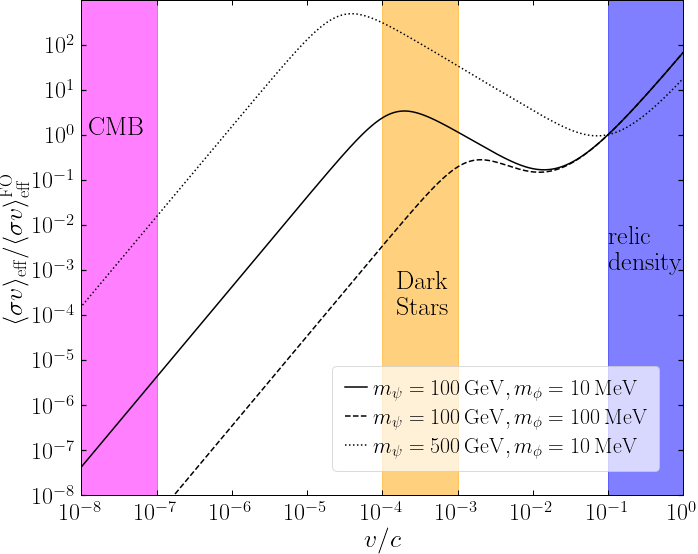

In [13]:
fig = plt.figure(figsize=(10,8))
plt.plot(vel, sigma_v1, 'k-', label = r'$m_\psi = 100\,{\rm GeV}, m_\phi = 10\,{\rm MeV}$')
plt.plot(vel, sigma_v2, 'k--', label = r'$m_\psi = 100\,{\rm GeV}, m_\phi = 100\,{\rm MeV}$')
plt.plot(vel3, sigma_v3, 'k:',  label = r'$m_\psi = 500\,{\rm GeV}, m_\phi = 10\,{\rm MeV}$')
# plt.plot(vel, sigma_v4, 'b-', label = 'test')
plt.fill_between(x = [0.1, 1], y1 = [10**(-8), 10**(-8)], y2 = [1000, 1000], alpha = 0.5, color = 'blue')
plt.fill_between(x = [10**(-4), 10**(-3)], y1 = [10**(-8), 10**(-8)], y2 = [1000, 1000], alpha = 0.5, color = 'orange')
plt.fill_between(x = [10**(-8), 10**(-7)], y1 = [10**(-8), 10**(-8)], y2 = [1000, 1000], alpha = 0.5, color = 'magenta')
plt.text(10**(-7.9), 1, s = "CMB", color = 'black', fontsize = 26)
plt.text(10**(-3.8), 10**(-4), s = "Dark \n Stars", color = 'black', fontsize = 26)
plt.text(10**(-1), 10**(-3), s = "relic\n density", color = 'black', fontsize = 26)
ax = plt.axes()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$v/c$')
plt.ylabel(r'$\langle\sigma v\rangle_{\rm eff}/\langle\sigma v\rangle_{\rm eff}^{\rm FO}$')
plt.xticks(np.logspace(-9,0,num=10))
plt.yticks(np.logspace(-8,2,num=11))
plt.ylim(10**(-8),1000)
plt.xlim(10**(-8), 1)
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()
fig.savefig('Sommerfeld.pdf')

In [21]:
# CMB constraint region
m_psi = np.arange(2, 3, 0.01)
m_phi = np.arange(-3, -1, 0.01)
res = []
for i in range(len(m_phi)):
    row = []
    for j in range(len(m_psi)):
        row.append(CMB_constrain(10**m_psi[j], 10**m_phi[i]))
    
    res.append(row)
    
np.savetxt('CMB_constraint.txt',res, delimiter = '\t')